In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
import datetime

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_excel('TimeSeriesDataDaukhi.xlsx')
df = pd.DataFrame(df)

In [ ]:
df.head(5)

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.6,NaN,10.9,8.0,3.5
1,2017-01-04,8.6,NaN,10.9,8.1,3.5
2,2017-01-05,8.6,NaN,10.5,8.1,3.6
3,2017-01-06,8.6,NaN,10.3,8.0,3.6
4,2017-01-09,8.6,NaN,10.4,8.1,3.7


In [ ]:
#Convert Date to datetime data and arrange 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')

In [ ]:
#tính giá trị trung bình mỗi cột
PCG=df['PCG'].mean(axis=0)
PLX=df['PLX'].mean(axis=0)
PVB=df['PVB'].mean(axis=0)
PVC=df['PVC'].mean(axis=0)
PVO=df['PVO'].mean(axis=0)

In [ ]:
#fill missing date 
groupby_day = df.groupby(pd.PeriodIndex(data=df.Date, freq='D'))
results = groupby_day.sum()
idx = pd.period_range(min(df.Date), max(df.Date))
df =results.reindex(idx, fill_value=0).rename_axis('Date').reset_index()
df

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.6,0.0,10.9,8.0,3.5
1,2017-01-04,8.6,0.0,10.9,8.1,3.5
2,2017-01-05,8.6,0.0,10.5,8.1,3.6
3,2017-01-06,8.6,0.0,10.3,8.0,3.6
4,2017-01-07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1819,2021-12-27,9.6,54.1,19.0,16.4,10.1
1820,2021-12-28,9.8,53.8,19.3,16.6,9.9
1821,2021-12-29,10.7,54.0,19.5,16.6,9.9
1822,2021-12-30,10.7,54.0,20.6,17.2,10.0


In [ ]:
#thay thể giá trị null bằng giá trị trung bình
df["PLX"]=df["PLX"].replace(0.0, PLX)
df["PCG"]=df["PCG"].replace(0.0, PCG)
df["PVB"]=df["PVB"].replace(0.0, PVB)
df["PVC"]=df["PVC"].replace(0.0, PVC)
df["PVO"]=df["PVO"].replace(0.0, PVO)
df

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.600000,58.268426,10.900000,8.000000,3.500000
1,2017-01-04,8.600000,58.268426,10.900000,8.100000,3.500000
2,2017-01-05,8.600000,58.268426,10.500000,8.100000,3.600000
3,2017-01-06,8.600000,58.268426,10.300000,8.000000,3.600000
4,2017-01-07,11.131629,58.268426,16.340176,8.022923,5.201917
...,...,...,...,...,...,...
1819,2021-12-27,9.600000,54.100000,19.000000,16.400000,10.100000
1820,2021-12-28,9.800000,53.800000,19.300000,16.600000,9.900000
1821,2021-12-29,10.700000,54.000000,19.500000,16.600000,9.900000
1822,2021-12-30,10.700000,54.000000,20.600000,17.200000,10.000000


In [ ]:
# Filter the data for a single stock code
#df = df[(df['code'] == 'PLX') | (df['code'] == 'PVC') | (df['code'] == 'PVB') | (df['code'] == 'PVO') | (df['code'] == 'PCG')] #PLX, PVC, PVB, PVO, PCG

In [ ]:
#df1 = df[(df['code'] == 'PLX')]

In [ ]:
#df2 = df[(df['code'] == 'PVC')]

In [ ]:
#df3 = df[(df['code'] == 'PVB')]

In [ ]:
#df4 = df[(df['code'] == 'PVO')]

In [ ]:
#df5 = df[(df['code'] == 'PCG')]

In [ ]:
# create date time features of a dataset
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [ ]:
df.to_excel(r'XuLyDaukhi.xlsx', index=False)

In [ ]:
df

,PCG,PLX,PVB,PVC,PVO,Year,Month,Day
Date,,,,,,,,
2017-01-03,8.600000,58.268426,10.900000,8.000000,3.500000,2017,1,3
2017-01-04,8.600000,58.268426,10.900000,8.100000,3.500000,2017,1,4
2017-01-05,8.600000,58.268426,10.500000,8.100000,3.600000,2017,1,5
2017-01-06,8.600000,58.268426,10.300000,8.000000,3.600000,2017,1,6
2017-01-07,11.131629,58.268426,16.340176,8.022923,5.201917,2017,1,7
...,...,...,...,...,...,...,...,...
2021-12-27,9.600000,54.100000,19.000000,16.400000,10.100000,2021,12,27
2021-12-28,9.800000,53.800000,19.300000,16.600000,9.900000,2021,12,28
2021-12-29,10.700000,54.000000,19.500000,16.600000,9.900000,2021,12,29


In [ ]:
#Set index
df.set_index('Date',inplace=True)

In [ ]:
pip install calplot

  Using cached calplot-0.1.7.5.tar.gz (132 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=43b82affebc73a2032892e7a8b49357b8067bcf9180b42505aed3572f0853538
  Stored in directory: /Users/haochile/Library/Caches/pip/wheels/eb/d8/9b/c0402d22680cb2c72cd1a2ae9cf7df772d68ea33d20c115289
Successfully built calplot
Note: you may need to restart the kernel to use updated packages.


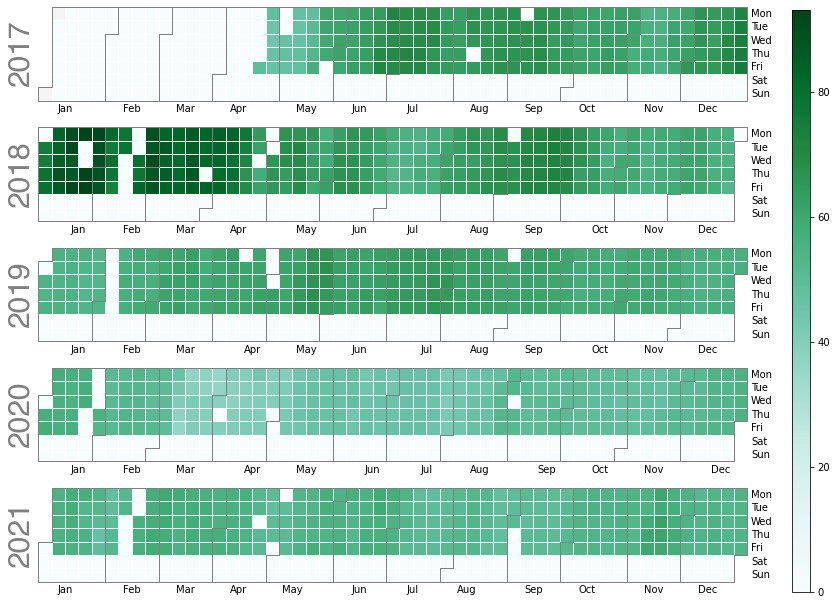

In [ ]:
#calender & heat map for each stock code
import calplot
calplot.calplot(df['PLX'], cmap="BuGn", colorbar=True);

<AxesSubplot:title={'center':'close'}, xlabel='code'>

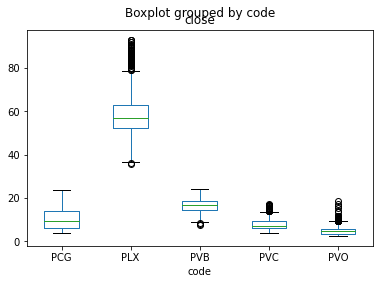

In [ ]:
#box plot
df.boxplot(by ='code', column =['close'], grid = False)

In [ ]:
#Xac dinh vi tri va gia tri cua Outilers
import numpy as np

def detect_outliers(series):
  """
    series: 1-D numpy array input
  """
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outlier_idxs = np.where(lower_compare | upper_compare)[0]
  return outlier_idxs

outlier_idxs=detect_outliers(df['PVB'])
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df.index[outlier_idxs].values)
print("Outlier values: ", df['PVB'][outlier_idxs])

Outlier indices:  [807 808 809]
Outlier months:  ['2020-03-30T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000']
Outlier values:  Date
2020-03-30    8.4
2020-03-31    7.6
2020-04-01    8.0
Name: PVB, dtype: float64
